In [4]:
import pandas as pd
from nltk.tokenize import word_tokenize
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [3]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
train_df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [4]:
%matplotlib inline
import  matplotlib.pyplot as plt
targets = train_df.drop(["id","comment_text"],axis=1)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


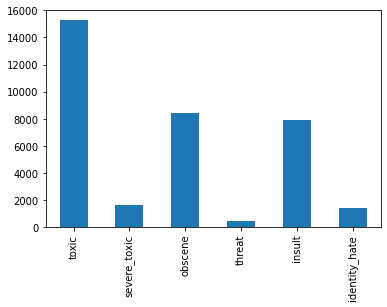

In [5]:
targets.sum().plot(kind="bar")
print(targets.sum())

In [6]:
#create new class for unabled comments
def is_non_toxic(train_df):
    if (train_df["toxic"] == 0) and (train_df["severe_toxic"] == 0) and (train_df["obscene"] == 0) and (train_df["threat"] == 0) and (train_df["insult"] == 0) and (train_df["identity_hate"] == 0):
        return 1
    return 0
train_df["non_toxic"] = train_df.apply(is_non_toxic,axis=1)

toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
non_toxic        143346
dtype: int64


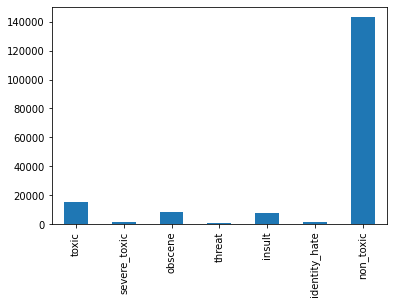

In [7]:
targets = train_df.drop(["id","comment_text"],axis=1)
targets.sum().plot(kind="bar")
print(targets.sum())

In [5]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [9]:
# check length of comments
#This takes a long time
train_df["length"] = train_df["comment_text"].apply(lambda x: len(word_tokenize(x)))


Text(0.5, 1.0, 'Comments histogram')

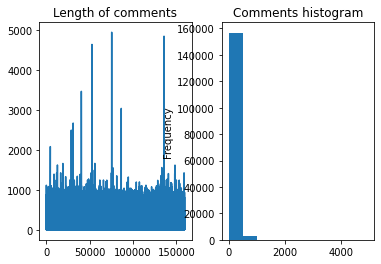

In [10]:
fig, axes = plt.subplots(1, 2)
train_df["length"].plot(ax=axes[0])
train_df["length"].plot.hist(ax=axes[1])

axes[0].set_title('Length of comments')
axes[1].set_title('Comments histogram')

In [11]:
train_df["length"].mean(), train_df["length"].std()

(80.35988368813882, 120.83291586911287)

In [12]:
train_df["length"].max(),train_df["length"].min()

(4948, 1)

In [13]:
train_df[train_df["length"] == train_df["length"].min()]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic,length
55751,94f5c6667f0bd193,Complaints/Mistakes,0,0,0,0,0,0,1,1
111438,54231ea3dfe948b1,|needs-infobox=yes,0,0,0,0,0,0,1,1


In [14]:
train_df[train_df["length"] == train_df["length"].max()]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic,length
75499,c9f42b4dedc3cbf0,YOU!\nYou blocked me worm why!!!!!!!!!!!!!!!!!...,1,0,0,0,0,0,0,4948


# Preprocessing

In [5]:
text = train_df["comment_text"].to_list()

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import string
import re

URL = "http://\S+|https://\S+"

_stopwords = set(stopwords.words("english"))
punks = string.punctuation
def remove_stopwords(text):
    return [" ".join([word for word in t.split(" ") if word not in _stopwords]) for t in text]

def remove_punkts(text):
    return [" ".join([word for word in t.split(" ") if word not in punks]) for t in text]
   
def to_lower(text):
    return [t.lower() for t in text]

def tokenize(text):
    return [ " ".join(word_tokenize(t)) for t in text]

def remove_urls(text):
    return [re.sub(URL,"",t)  for t in text]

def remove_newlines(text):
    return [" ".join(t.split())  for t in text] 


text_min = text[:3]
print(text_min)
text_min = tokenize(text_min)
text_min = remove_punkts(text_min)
text_min = remove_stopwords(text_min)
text_min = remove_urls(text_min)
text_min = to_lower(text_min)
text_min = remove_newlines(text_min)
text_min

["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27", "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)", "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."]


["explanation why edits made username hardcore metallica fan reverted they n't vandalisms closure gas i voted new york dolls fac and please n't remove template talk page since i 'm retired now.89.205.38.27",
 "d'aww he matches background colour i 'm seemingly stuck thanks talk 21:51 january 11 2016 utc",
 "hey man i 'm really trying edit war it 's guy constantly removing relevant information talking edits instead talk page he seems care formatting actual info"]

In [188]:
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import string
import re

class TokenizerTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, **tokenizer_params):
        self.stopwords = set(stopwords.words("english"))
        self.punks = string.punctuation
        self.stemmer = PorterStemmer()

    def fit(self, X, y):
        return self

    def transform(self, X, y=None):
        transforms = [
            self.to_stem,
            self.remove_newline,
            self.remove_punkts,
            self.remove_stopwords,
            self.remove_urls,
            self.to_lower
        ]
        text = X
        for transform in transforms:
            text = transform(text)
        return text

    def to_stem(self, text):
        return [" ".join([self.stemmer.stem(word) for t in text for word in t.split(" ") ])]

    def remove_stopwords(self, text):
        return [" ".join([word for word in t.split(" ") if word not in self.punks]) for t in text]

    def remove_punkts(self, text):
        return [" ".join([word for word in t.split(" ") if word not in self.stopwords]) for t in text]
   
    def to_lower(self, text):
        return [t.lower() for t in text]
      
    def remove_urls(self, text):
        URL = "http://\S+|https://\S+"
        return [re.sub(URL,"",t)  for t in text]

    def remove_newline(self,text):
        return [' '.join(t.splitlines())  for t in text]
train_df = pd.read_csv("data/train.csv", nrows=2)
pipeline = Pipeline([
    ("tokenizer", TokenizerTransformer())
])
pipeline.transform(train_df["comment_text"])


["explanation whi edit made usernam hardcor metallica fan reverted? vandalisms, closur ga i vote new york doll fac. pleas remov templat talk page sinc i'm retir now.89.205.38.27 d'aww! he match thi background colour i'm seemingli stuck with. thanks. (talk) 21:51, januari 11, 2016 (utc)"]

In [189]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split

train_df = pd.read_csv("data/train.csv", nrows=2)

pipeline = Pipeline([
    ("tokenizer", TokenizerTransformer()),
    ("vectorizer", CountVectorizer(max_features=10000)),
    ("clf", MultiOutputClassifier(MultinomialNB()))
])

target_cols = filter(lambda x: x != "id" and x != "comment_text", train_df.columns.to_list()) 
X = train_df["comment_text"]
y = train_df[target_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, random_state = 42)

pipeline.fit(X_train, y_train)
# y_tests = y_test.to_numpy()
# y_preds = np.transpose(np.array(model.predict_proba(X_test))[:,:,1])

Pipeline(steps=[('tokenizer', TokenizerTransformer()),
                ('vectorizer', CountVectorizer(max_features=10000)),
                ('clf', MultiOutputClassifier(estimator=MultinomialNB()))])

In [30]:
pd.set_option('display.max_colwidth', -1)
str(train_df[train_df["id"] =="b75137411461011c"]["comment_text"])

"68522    Here are three ways to iterate from 2.\\nt = { 'a', 'b', 'c', 'd' }\\nfor i, v in ipairs(t) do\\n    if i > 1 then\\n        print(i, v)\\n    end\\nend\\nfor i = 2, #t do\\n    print(i, t[i])\\nend\\nfor i = 2, 1e6 do   where 1e6 (1 million) is larger than needed\\n    if not t[i] then break end\\n    print(i, t[i])\\nend\\n\\nFor a strange order, use another table.\\nt = { 'a', 'b', 'c', 'd', color = 'red' }\\nfor _, v in ipairs({ 3, 'color', 4, 2 }) do\\nTABprint(t[v])\\nend\\n\\nBy the way, I use the following for accummulating results.\\nlocal function collection()\\nTAB Return a table to hold items.\\nTABreturn {\\nTABTABn = 0,\\nTABTABadd = function (self, item)\\nTABTABTABself.n = self.n + 1\\nTABTABTABself[self.n] = item\\nTABTABend,\\nTABTABjoin = function (self, sep)\\nTABTABTABreturn table.concat(self, sep)\\nTABTABend,\\nTAB}\\nend\\n\\nlocal function work()\\nTABlocal results = collection()\\nTABfor i = 1, 5 do\\nTABTABresults:add('i = ' .. i)\\nTABend\\nTABretu

In [63]:
text_min = [str(train_df[train_df["id"] =="b75137411461011c"]["comment_text"])]
# print(text_min)
# text_min = tokenize(text_min)
text_min = tokenize(text_min)
text_min = remove_punkts(text_min)
text_min = remove_stopwords(text_min)
text_min = remove_urls(text_min)
text_min = to_lower(text_min)
text_min = remove_newlines(text_min)
text_min

["68522 here three ways iterate 2.\\nt b c 'd \\nfor v ipairs do\\n 1 then\\n print v \\n end\\nend\\nfor 2 do\\n print \\nend\\nfor 2 1e6 1e6 1 million larger needed\\n break end\\n print \\nend\\n\\nfor strange order use another table.\\nt b c 'd color 'red \\nfor v ipairs 3 'color 4 2 do\\ntabprint v \\nend\\n\\nby way i use following accummulating results.\\nlocal function collection \\ntab return table hold items.\\ntabreturn \\ntabtabn 0 \\ntabtabadd function self item \\ntabtabtabself.n self.n 1\\ntabtabtabself self.n item\\ntabtabend \\ntabtabjoin function self sep \\ntabtabtabreturn table.concat self sep \\ntabtabend \\ntab \\nend\\n\\nlocal function work \\ntablocal results collection \\ntabfor 1 5 do\\ntabtabresults add .. \\ntabend\\ntabreturn results join '\\n \\nend\\n\\nlocal work string 5 lines name comment_text dtype object"]

# Inital Model

Using Nieve Bayes

In [17]:
import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
import nltk
from nltk.corpus import stopwords
import string
import re
from sklearn.base import BaseEstimator, TransformerMixin

class TokenizerTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, **tokenizer_params):
        self.stopwords = set(stopwords.words("english"))
        self.punks = string.punctuation

    def fit(self, X, y):
        return self

    def transform(self, X, y=None):
        text = self.tokenize(X)
        text = self.remove_punkts(text)
        text = self.remove_stopwords(text)
        text = self.remove_urls(text)
        text = self.to_lower(text)
        return text

    def remove_stopwords(self, text):
        return [" ".join([word for word in t.split(" ") if word not in self.stopwords]) for t in text]

    def remove_punkts(self, text):
        return [" ".join([word for word in t.split(" ") if word not in self.punks]) for t in text]
   
    def to_lower(self, text):
        return [t.lower() for t in text]

    def tokenize(self, text):
        return [ " ".join(word_tokenize(t)) for t in text]

    def remove_urls(self, text):
        URL = "http://\S+|https://\S+"
        return [re.sub(URL,"",t)  for t in text]

class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split


from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import numpy as np

pipeline = Pipeline([
    ("transformer",TokenizerTransformer()),
    ("vectorizer", CountVectorizer()),
    ("tfidf", TfidfTransformer()),
    ('to_dense', DenseTransformer()), 
    ("clf", MultinomialNB())
])


In [38]:
debug = False
save_model = False

target_cols = filter(lambda x: x != "id" and x != "comment_text", train_df.columns.to_list()) 
train, test = train_test_split(train_df, random_state=42)

if debug:
    target_cols = ["toxic"]
    train = train.sample(n=1000)
scores = []
for target in target_cols:
    X = train["comment_text"]
    y = train[target]
    pipeline.fit(X,y)
    y_preds = pipeline.predict(test["comment_text"])
    score = roc_auc_score(test[target], y_preds)
    scores.append({"col":col,"score":score})
    if save_model:
        joblib.dump(pipeline, f'{col}_model.pkl', compress=9)



In [ ]:
scores

<AxesSubplot:xlabel='col'>

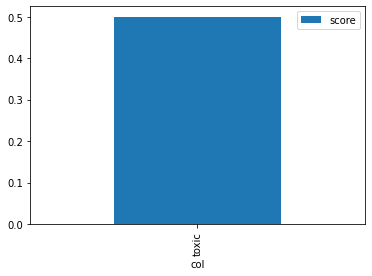

In [35]:
scores_df = pd.DataFrame(scores)
scores_df.plot(x='col',y='score', kind="bar")

In [80]:
scores_df

,col,score
0,toxic,0.704902
1,severe_toxic,NaN
2,obscene,0.689181
3,threat,NaN
4,insult,0.689474
5,identity_hate,NaN


In [164]:
sample_df = pd.read_csv("sample_submission.csv")
submit_df = pd.merge(test_df, sample_df, on="id")
preds = pio

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5,":If you have a look back at the source, the in..."
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5,I don't anonymously edit articles at all.
...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5,""" \n\n == """"One of the founding nations of the..."


# Predict

In [17]:
import pandas as pd
import joblib
from src.sklearn.train import TokenizerTransformer, DenseTransformer

sample_submission = pd.read_csv("data/sample_submission.csv")
test_df = pd.read_csv("data/test.csv")
df_test = pd.merge(test_df, sample_submission, on = "id")

model = joblib.load("model.pkl")
y_pred = model.predict(df_test["comment_text"])
print

<function print>

In [12]:
df_test[["toxic","severe_toxic","obscene","threat","insult","identity_hate"]] = y_pred
df_test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,1,0,1,0,1,0
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0,0,0,0,0,0
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0,0,0,0,0,0
3,00017563c3f7919a,":If you have a look back at the source, the in...",0,0,0,0,0,0
4,00017695ad8997eb,I don't anonymously edit articles at all.,0,0,0,0,0,0


In [28]:
train_df = pd.read_csv("data/train.csv")

train_df[train_df["id"] == "b75137411461011c"]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
68522,b75137411461011c,Here are three ways to iterate from 2.\nt = { ...,0,0,0,0,0,0


In [14]:
df_test.drop(["comment_text"], axis = 1, inplace = True)
df_test.to_csv("submission.csv", index = False)

In [16]:
!kaggle competitions submit -c jigsaw-toxic-comment-classification-challenge -f submission.csv -m "baseline"

100%|██████████████████████████████████████| 4.24M/4.24M [00:01<00:00, 2.23MB/s]
Successfully submitted to Toxic Comment Classification Challenge

In [1]:
train_df

NameError: name 'train_df' is not defined